In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print(pd.__version__)
print(sns.__version__)
print(np.__version__)

1.4.4
0.12.0
1.23.2


In [4]:
train_df=pd.read_csv("titanic/train.csv")
test_df=pd.read_csv("titanic/test.csv")
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


In [5]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 칼럼(피쳐스, features)
- Survial 생존여부 0=No, 1=Yes
- Pclass 티켓 클래스 1=1st, 2=2nd, 3=3rd
- Sex 성별
- Age 나이
- SibSp 형제, 자매, 배우자가 배에 탄수
- Parch 부모, 자식이 배에 탄수
- ticket 티켓 번호
- fare 지불 금액
- cabin 객실 번호
- embarked 승선항 C=Cherbourg, Q= Queenstown, S=Southampton

### 범주형
- 명목형: Survived, Sex, Embarked
- 순서형: Pcalss
### 숫자형
- 연속형: Age, Fare
- 이산형: SipSp, Parch

### 혼합 데이터 유형
- Ticket
- Cabin
### 오류 또는 오타 있을 수 있는 데이터
- Name
### 빈값
- Cabin>Age>Embarked
### Object
- 5개의 칼럼
- 숫자형은 7개

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 수치 값의 분포
- 실제 탑승자(2,224명)의 40% 891명
- 35%정도 생존, 실제 생존율 38%
- 대부분 승객(75%)은 부모나 자녀와 함께 여행하지 않았다
- 승객의 30% 가까이가 형제,자매, 배우자 한명과 탑승했다
- 요금은 다양하게 지불
- 20~38세가 가장 많고 최고령은 80세

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 범주형 컬럼의 분포
- 이름은 전체에서 고유
- 남성이 65%
- 캐빈값은 중복이 되고 여러 명의 승객이 객실을 공유했다
- 세가지 항구에서 승객이 탑승했고, 대부분 승객이 S항에서 승선했다
- 티켓은 중복된 값이 22% 높다

In [9]:
train_df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 데이터 분석을 기반으로 가정
#### 상관
 상관 관계 찾기
#### 완료(완성)
 1. Age는 상관관계가 높기 때문에 결측치를 처리해서 완성
 2. Embarked 결측치를 처리해서 완성
#### 수정
 1. Ticket 제외 될 수 있다
 2. Cabin 제외 될 수 있다
 3. PId 제외 될 수 있다
 4. Name 제외 될 수 있다
#### 생성
 1. Parch, SipSp 총 가족수로 변환
 2. Name 칼럼에서 Title 새 칼럼으로 추출 할 수 있다
 3. 나이(Age) 범위를 새롭게 칼럼으로 만들 수 있다
 4. 학습에 도움이 될 경우 요금(Fare) 범주형으로 만들수 있다
#### 분류
 1. 여성이 생존했을 가능성이 높다
 2. 어린이가 생존했을 가능성이 높다
 3. 상류층 승객이 더 생존했을 가능성이 높다

### 피봇 피쳐로 분석
 상관 관계를 신속하게 분석, 빈 값이 없는 피쳐에 대해 작업, 명목형(Sex), 순서형(Pclass), 이산형(SibSp,Parch)
 
 - **Pclass** 유의미한 상관관계가 있다. 피쳐를 우리 모델에 포함
 - **Sex** 여성의 생존율이 거의 74%
 - **SibSp, Parch** 상관관계가 별로 없다. 가족수라는 새로운 칼럼으로 도출해보자.

In [10]:
train_df[["Pclass","Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
train_df[["Sex","Survived"]].groupby(["Sex"]).mean()\
.sort_values(by="Survived",ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
train_df[["SibSp","Survived"]].groupby(["SibSp"]).mean()\
.sort_values(by="Survived",ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
train_df[["Parch","Survived"]].groupby(["Parch"]).mean()\
.sort_values(by="Survived",ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


## 데이터를 시각화하여 분석
### 수치 특성의 상관 관계
수치 특성과 Survived 사이의 상관관계 이해
히스토그램 col-Survived, x-수치 특성

**관찰**
- 유아(나이<=5) 생존율이 높았다
- 80세 승객은 생존 했다
- 15-25세가 많은 수가 살아 남자 못했다
- 대부분 승객은 15세~35세 사이다

**결정 사항**
- 모델 훈련에서 나이를 고려 해 볼 수 있다.
- null값을 처리해서 나이를 완성해야 된다.
- 나이 범위 그룹으로 만들어야 된다.

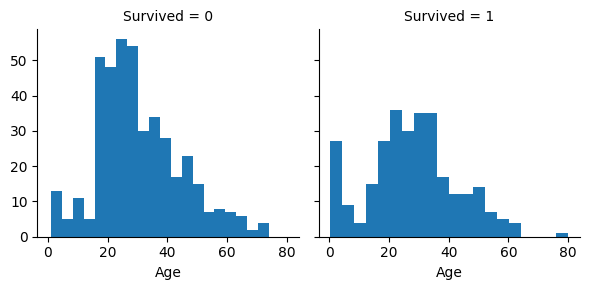

In [14]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist, "Age",bins=20)

### 상관관계 확인: 명목형과 순서형의 피쳐들
Pclass 시각화

**관찰**
- Pclass=3 대부분의 승객, 대부분 살아 남지 못했다
- Pc=3,Pc=2,Pc=1 유아 승객이 생존 비율이 높았다
- Pc=1 승객 대부분은 생존
- Pclass는 승객 연령 분포가 다양하다

**결정 사항**
- 모델 학습을 위해 Pclass 고려한다

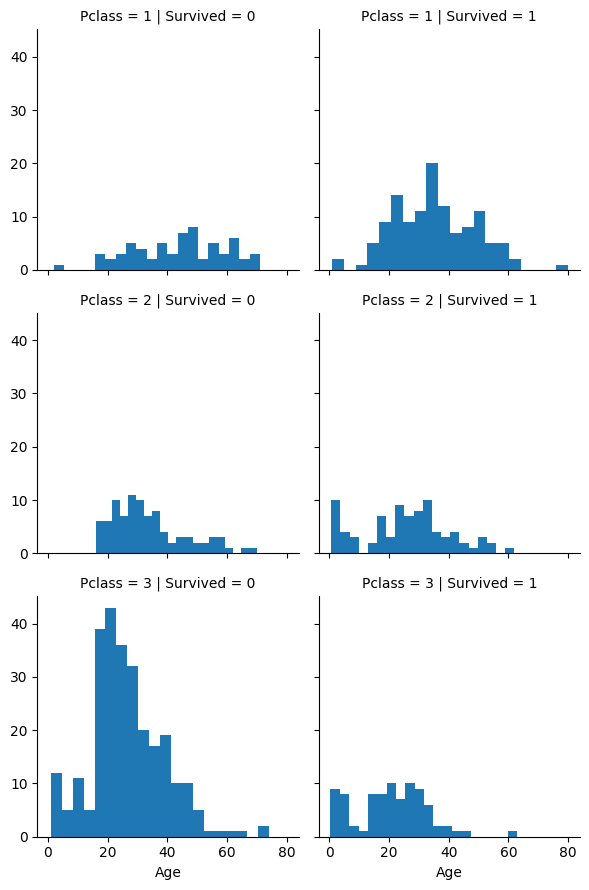

In [15]:
g=sns.FacetGrid(train_df,col="Survived", row="Pclass")
g.map(plt.hist,"Age",bins=20)

## 범주형 피쳐 상관관계
승선항, 성별, 좌석등급에 대해 시각화

**관찰**
- 여성 승객이 남성 승객보다 생존율이 높다
- C 승선항은 남성이 더 생좀함. Pclass와 Embarked의 상관관계 일 수 있다.Pclass와 Survived와의 상관관계가 깊다.

**결정 사항**
- 모델 학습에서 성별 피쳐를 추가
- 모델 학습에서 승선항도 완성을 시켜서 추가

C:\Users\User\miniconda38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\User\miniconda38\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


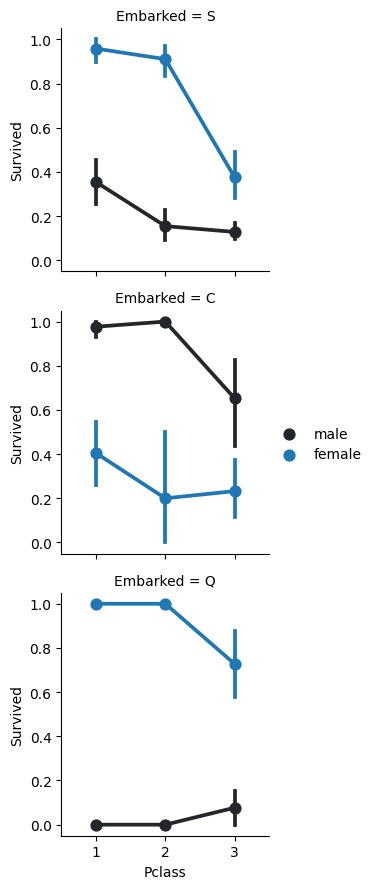

In [16]:
g=sns.FacetGrid(train_df,row="Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()

### 범주형 및 숫자형 피쳐의 상관 관계
승선항, 성별, 요금, 생존 상관 관계를 고려

**관찰**
- 요금을 더 많이 낸 승객이 많이 생존 했다
- 승선 항구도 생존율과 상관 관계가 있다

**결정**
- 요금 범위를 만들어서 피쳐로 활용해 볼 수 있다
- 승선 항구도 피쳐로 활용 한다

C:\Users\User\miniconda38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


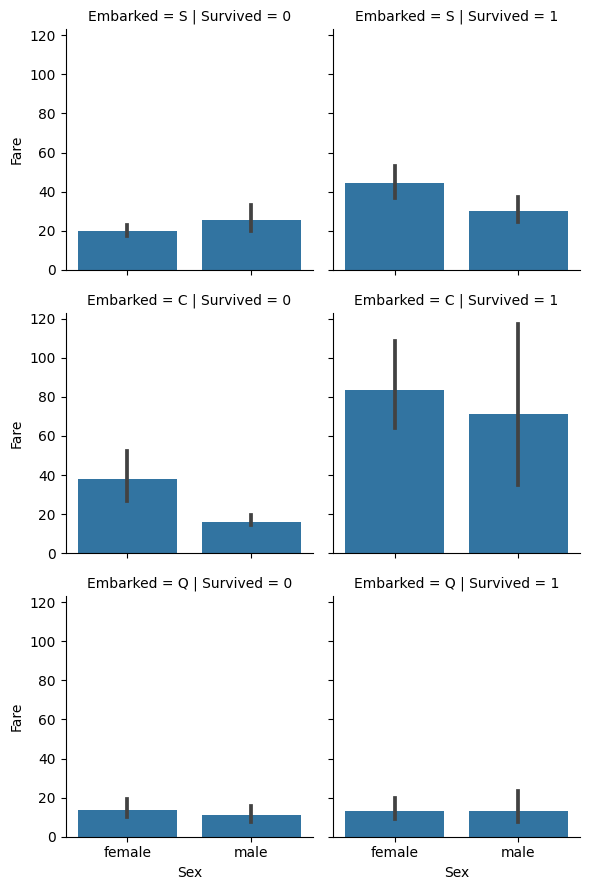

In [17]:
g=sns.FacetGrid(train_df,row="Embarked", col="Survived")
g.map(sns.barplot,"Sex","Fare")

- 몇가지 가정과 결정을 수집
- 결정한 것을 수정, 생성 및 완료

### 피쳐를 삭제

(과대 적합-상관 관계가 없는 칼럼이나 표준편차에 벗어 나는 값들이 너무 많이 존재 하는 상태)

객실과 티켓 피쳐 삭제


In [18]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S


In [19]:
print("Before", train_df.shape, test_df.shape)

# pop, drop->axis
train_df=train_df.drop(["Ticket","Cabin"],axis=1)
test_df=test_df.drop(["Ticket","Cabin"],axis=1)

combine=[train_df,test_df]

print("After",train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


### 기존 피쳐에서 추출하여 새 피쳐 작성
1. Name 피쳐(칼럼)에서 타이틀을 추출
2. PId 삭제

In [20]:
for dataset in combine:
    dataset["Title"]=\
        dataset.Name.str.extract(" ([A-Za-z]+)\.",expand=False)

pd.crosstab(train_df["Title"],train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
# 일반적인 타이틀로 수정
# 너무 적은 타이틀은 "희귀한" 변경
for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(["Lady",
        "Countess","Capt","Col","Don","Dr","Major",
        "Rev","Sir","Jonkheer","Dona"],"Rare")
    dataset["Title"]=dataset["Title"].replace("Mlle","Miss")
    dataset["Title"]=dataset["Title"].replace("Ms","Miss")
    dataset["Title"]=dataset["Title"].replace("Mme","Mrs")

train_df[["Title","Survived"]].groupby(["Title"],
    as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
#범주형 문자열 타이틀을 순서형 숫자로 변환
title_mapping={"Mr":1,"Miss":2,"Master":4,"Rare":5}
for dataset in combine:
    dataset["Title"]=dataset["Title"].map(title_mapping)
    dataset["Title"]=dataset["Title"].fillna(0)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,7.7500,Q,1.0
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,7.9250,S,1.0
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,7.8958,C,1.0
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,81.8583,S,4.0
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,78.2667,C,2.0


In [23]:
# 이름 피쳐 삭제
# 승객아이디 삭제
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]
train_df.shape, test_df.shape
# Run > Run All Cells

((891, 9), (418, 9))

In [24]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
558,1,1,female,39.0,1,1,79.6500,S,0.0
742,1,1,female,21.0,2,2,262.3750,C,2.0
502,0,3,female,NaN,0,0,7.6292,Q,2.0
362,0,3,female,45.0,0,1,14.4542,C,0.0
625,0,1,male,61.0,0,0,32.3208,S,1.0


### 범주형 문자 피쳐 변환
문자열을 포함하는 피쳐를 숫자로 변환
성별 여성=1, 남성=0 변환

In [25]:
for dataset in combine:
    dataset["Sex"]=dataset["Sex"].map({"female":1,"male":0})\
        .astype(int)
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
302,0,3,0,19.0,0,0,0.0000,S,1.0
827,1,2,0,1.0,0,2,37.0042,C,4.0
334,1,1,1,NaN,1,0,133.6500,S,0.0
617,0,3,1,26.0,1,0,16.1000,S,0.0
264,0,3,1,NaN,0,0,7.7500,Q,2.0


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 59.3+ KB


### 결측값 처리해서 완료
1. 너무 적을 때 삭제
2. 평균이나 최빈도수로 삽입
3. 평균과 표준편차 사이의 난수를 생성
4. 다른 피쳐들과의 상관관계를 찾아서 삽입
5. 위에 방법들을 조합해서 사용

In [27]:
#결측치 확인
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64


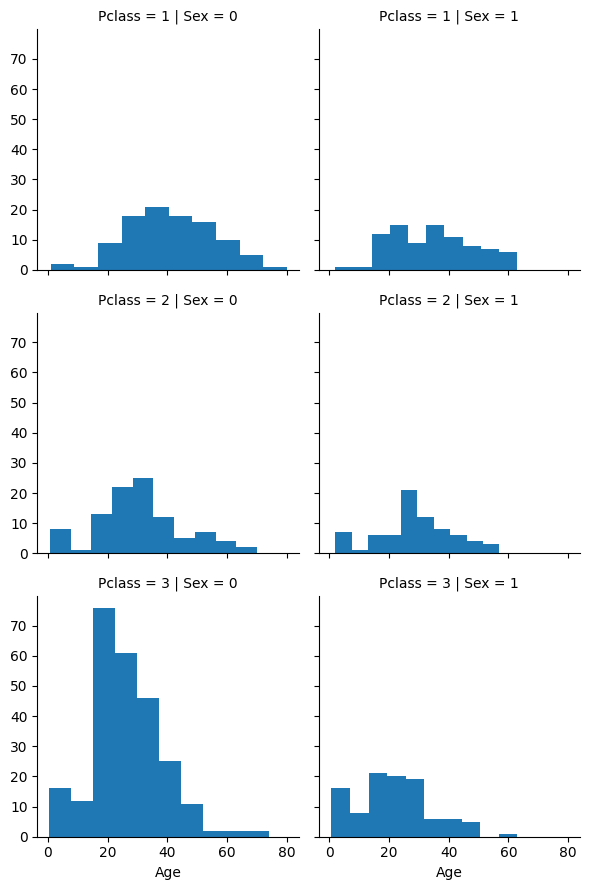

In [28]:
# 나이 PclassXGender
g=sns.FacetGrid(train_df, row="Pclass",col="Sex")
g.map(plt.hist,"Age")

In [29]:
#Pclass, Gender 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Sex"]==i)\
                & (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&\
                (dataset.Sex==i)&(dataset.Pclass==j+1),\
                "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [31]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [32]:
# Age를 범위 밴드형으로 만들고 생존 상관 관계를 확인
# 예) 0~5세, 6~10세
# cut 데이터를 동일한 길이로 나눠줌
train_df["AgeBand"]=pd.cut(train_df["Age"],5)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],
    as_index=False).mean().sort_values(by="AgeBand")

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
661,0,3,0,40,0,0,7.2250,C,1.0,"(32.0, 48.0]"
428,0,3,0,26,0,0,7.7500,Q,1.0,"(16.0, 32.0]"
52,1,1,1,49,1,0,76.7292,C,0.0,"(48.0, 64.0]"
120,0,2,0,21,2,0,73.5000,S,1.0,"(16.0, 32.0]"
613,0,3,0,26,0,0,7.7500,Q,1.0,"(16.0, 32.0]"


In [34]:
# Age를 서수로 대체
for dataset in combine:
    dataset.loc[dataset["Age"]<=16,"Age"]=0
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=32),"Age"]=1
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<=48),"Age"]=2
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<=64),"Age"]=3
    dataset.loc[(dataset["Age"]>64),"Age"]=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,0.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,0.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [35]:
# AgeBand는 삭제
train_df=train_df.drop(["AgeBand"],axis=1)
combine=[train_df,test_df]
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,1,0,0,13.00,S,5.0
887,1,1,1,1,0,0,30.00,S,2.0
888,0,3,1,1,1,2,23.45,S,2.0
889,1,1,0,1,0,0,30.00,C,1.0
890,0,3,0,1,0,0,7.75,Q,1.0


### 기존 피쳐를 결합한 새 피쳐 작성
Parch와 SibSp를 결합한 FamilySize라는 새로운 피쳐를 생성
이를 통해서 기존 피쳐는 삭제 가능

In [36]:
for dataset in combine:
    dataset["FamilySize"]=dataset["Parch"]+dataset["SibSp"]+1
train_df[["FamilySize","Survived"]].groupby(
    ["FamilySize"],as_index=False).mean()\
    .sort_values(by="Survived",ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
# 가족과 함께 탑승, 홀로 탑승
# IsAlone이라는 피쳐를 생성
for dataset in combine:
    dataset["IsAlone"]=0
    dataset.loc[dataset["FamilySize"]==1,"IsAlone"]=1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"]).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [38]:
# Parch, SibSp, FamilySize 삭제
train_df=train_df.drop(["Parch","SibSp","FamilySize"],axis=1)
test_df=test_df.drop(["Parch","SibSp","FamilySize"],axis=1)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1.0,0
1,1,1,1,2,71.2833,C,0.0,0
2,1,3,1,1,7.9250,S,2.0,1
3,1,1,1,2,53.1000,S,0.0,0
4,0,3,0,2,8.0500,S,1.0,1


In [39]:
# Pclass*Age 새로운 피쳐를 생성
for dataset in combine:
    dataset["Age*Class"]=dataset["Age"]*dataset["Pclass"]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,S,1.0,0,3
1,1,1,1,2,71.2833,C,0.0,0,2
2,1,3,1,1,7.9250,S,2.0,1,3
3,1,1,1,2,53.1000,S,0.0,0,2
4,0,3,0,2,8.0500,S,1.0,1,6
5,0,3,0,1,8.4583,Q,1.0,1,3
6,0,1,0,3,51.8625,S,1.0,1,3
7,0,3,0,0,21.0750,S,4.0,0,0
8,1,3,1,1,11.1333,S,0.0,0,3
9,1,2,1,0,30.0708,C,0.0,0,0


### 범주형 피쳐 완성
승선항 결측치 처리
가장 흔한 값으로 채운다

In [40]:
#최빈값 mode()
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [41]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"])\
    .mean().sort_values(by="Survived",ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


### 변환: 카테고리형 피쳐를 숫자형으로
승선항을 숫자형으로 변환

In [42]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int32  
 3   Age        891 non-null    int32  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   Title      891 non-null    float64
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         417 non-n

(None, None)

In [43]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"]\
        .map({"S":0,"Q":1,"C":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1.0,0,3
1,1,1,1,2,71.2833,2,0.0,0,2
2,1,3,1,1,7.9250,0,2.0,1,3
3,1,1,1,2,53.1000,0,0.0,0,2
4,0,3,0,2,8.0500,0,1.0,1,6


In [44]:
# 요금에서 결측치
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [45]:
# 요금의 표준편차 중앙값으로 삽입
test_df["Fare"].fillna(test_df["Fare"].dropna().median()
                       ,inplace=True)
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [46]:
# FareBand 피쳐 생성
# cut - 길이를 기준으로 등분
# qcut - 양을 기준으로 등분
train_df["FareBand"]=pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"])\
         .mean().sort_values(by="FareBand", ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [47]:
# 요금 밴드를 기준으로 요금 피쳐를 서수값으로 대체
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.91,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7.91)\
                &(dataset["Fare"]<=14.454),"Fare"]=1
    dataset.loc[(dataset["Fare"]>14.454)\
                &(dataset["Fare"]<=31.0),"Fare"]=2
    dataset.loc[(dataset["Fare"]>31.0)\
                &(dataset["Fare"]<=512.329),"Fare"]=3

train_df=train_df.drop(["FareBand"],axis=1)
combine=[train_df,test_df]

train_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
127,1,3,0,1,0.0,0,1.0,1,3
717,1,2,1,1,1.0,0,2.0,1,2
568,0,3,0,1,0.0,2,1.0,1,3
405,0,2,0,2,2.0,0,1.0,0,4
177,0,1,1,3,2.0,2,2.0,1,3
880,1,2,1,1,2.0,0,0.0,0,2
187,1,1,0,2,2.0,0,1.0,1,2
48,0,3,0,1,2.0,2,1.0,0,3
859,0,3,0,1,0.0,2,1.0,1,3
90,0,3,0,1,1.0,0,1.0,1,3


In [48]:
# test_df 확인
test_df.sample(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
99,991,3,0,2,1.0,0,1.0,1,6
104,996,3,1,0,1.0,2,0.0,0,0
399,1291,3,0,1,0.0,1,1.0,1,3
44,936,1,1,2,3.0,0,0.0,0,2
297,1189,3,0,1,2.0,2,1.0,0,3
416,1308,3,0,1,1.0,0,1.0,1,3
121,1013,3,0,1,0.0,1,1.0,0,3
257,1149,3,0,1,1.0,0,1.0,1,3
101,993,2,0,1,2.0,0,1.0,0,2
135,1027,3,0,1,0.0,0,1.0,1,3


### 모델링, 예측 및 결과
- 텐서플로우, 파이토치: 팁러닝 프레임워크
- 케라스: 텐서플로우 2.0의 고성능 API
- 사이킷런: 머신러닝용 프레임워크

In [49]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]
X_test=test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [54]:
# 로지스틱 레그레이션
# 렐루, 시그모이드
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

79.69

In [55]:
#서포트 벡터 머신
#분류 알고리즘
#이진 데이터를 분류할 때 가장 좋은 성능
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

73.63

In [56]:
# k-NN 분류와 회귀
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

83.95

In [57]:
# 나이브 베이지안
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

72.84

In [58]:
#퍼셉트론
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

63.41

In [59]:
# LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred=linear_svc.predict(X_test)
acc_linear_svc=round(linear_svc.score(X_train,Y_train)*100,2)
acc_linear_svc

C:\Users\User\miniconda38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.01

In [60]:
# 확률적 경사 하강법(Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

75.53

In [62]:
# 결정 트리(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=\
    round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.76

In [66]:
# 랜덤 포레스트(Random Forest)
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=\
    round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.76

In [68]:
#모델에 대한 평가 순위를 매겨서 도출
models=pd.DataFrame({
    "Model":["SVM","KNN","Logistic Regression",
             "Random Forest","Naive Bayes","Perceptron",
             "SGD","L-SVC","Decision Tree"
            ],
    "Score":[
                acc_svc,acc_knn,acc_log,acc_random_forest,
                acc_gaussian, acc_perceptron, acc_sgd,
                acc_linear_svc,acc_decision_tree
            ]
    })
models.sort_values(by="Score", ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,83.95
2,Logistic Regression,79.69
7,L-SVC,79.01
6,SGD,75.53
0,SVM,73.63
4,Naive Bayes,72.84
5,Perceptron,63.41


### 모델 결정
 - 결정 트리는 교육 세트에 과적합하는 단점
 - 랜덤 포레스트 모델을 사용하기로 함

In [70]:
submission=pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":Y_pred
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [71]:
submission.to_csv("submission.csv",index=False)